# DL Workshop Part 3 - Solutions
Google Collab Link:
https://drive.google.com/file/d/1hVLmwHGRQeY54d0pYk2lcDhAdAccfHco/view?usp=sharing

## 4 Steps to train your model in Keras
1. Get your data into an easy format.
2. Define your model
```python
    from keras.models import Sequential
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
    #...
```
3. Compile the model (allocate memory, set up losses and metrics)
```python
    model.compile(loss=keras.losses.categorical_crossentropy, # for classification
                  optimizer=keras.optimizers.SGD(),
                  metrics=['accuracy'])
```
    * this does NOT start the training yet
4. fit the model
```python
    model.fit(x_test, y_test)
```

# 3.1 Watching - Get your data
* we are again using MNIST

In [1]:
from __future__ import print_function
import keras
import os
import glob
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt
from models import build_and_compile
%matplotlib inline


/home/sandro/anaconda2/envs/dl_ws/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# we are doing some stuff in the background to not confuse you too much
from data_loader import setup_data

x_train, y_train, x_test, y_test, input_shape, num_classes = setup_data()

### Remember Softmax? 

Our Targets are only the class as a single number.
But we want to have a **vector** for each class that as a **1** at the position of the correct class

For example:
the correct class is **4**: and we have 10 classes
we want to have
[0, 0, 0, **1**, 0, ...]

We can do this easily with 
```python
    y_train = keras.utils.to_categorical(y_train, num_classes)
```
and also for ```y_test```

This kind of format for classification is called **one-hot**-encoding or categorical

In [2]:
# convert class vectors to binary class matrices
if not y_train.shape[-1] == 10: # the if is just so that you can run this multiple times without breaking it
    print('target shape before: {}'.format(y_train.shape))
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    print('target shape after: {}'.format(y_train.shape))
else:
    print('target shape: {}'.format(y_train.shape))

target shape before: (60000,)
target shape after: (60000, 10)


# 3.2 HandsOn - Build your model
* Keras supports ```Sequential()````model definition. You start with the inputs and end with the outputs
* you start with an empty model
```python
    model = Sequential()
```
* then you just **add** Layers
```python
    model.add(layer)
```
* some example Layers
```python
    # creates a 2D conv layer with 32 feature maps, 3x3 convolutions, and relu activation
    conv_layer = Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu')
    # a Dense layer is the same as a fully connected layer
    fc_layer = Dense(128, activation='relu')
    pooling_layer = MaxPooling2D(pool_size=(2, 2))
```
* all Keras Layers
   https://keras.io/layers/about-keras-layers/
   
   
## your assigment: create the following model
```
2D conv - 3x3 - 32 feature maps - stride 1 - relu
2D conv - 3x3 - 64 feature maps - stride 1 - relu
2D max pooling - stride - stride 2
FC layer - 128 feature maps - relu
AND a final FC layer (fill in the gaps)
FC layer - ?? feature maps - ?? activation
```

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', strides=1,
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())  ## we need this to get get back to a vector instead of an image
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

## Checking your code: visualize your model when you are done

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


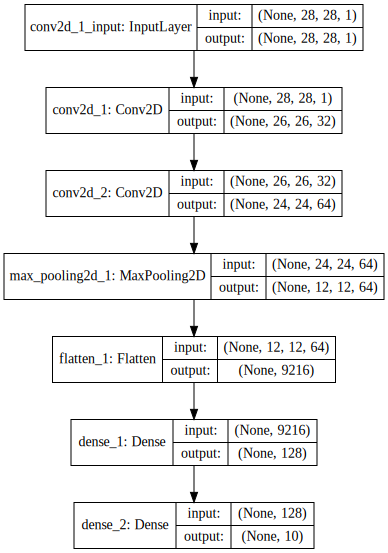

In [4]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
model.summary()
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) # similar output
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

## 3.3 HandsOn - Compile your Model
```python
    model.compile(loss=,
                  optimizer=,
                  metrics=[])
```

* choose a suitable loss
https://keras.io/losses/
* choose an informative metric. ```metrics``` has to be a list
https://keras.io/metrics/
* choose ADAM for optimization
```python
    optimizer = keras.optimizers.Adam()
```

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=[keras.metrics.categorical_accuracy])

# 3.4 HandsOn - Fit your Model

* use
```python
    model.fit(x_train, y_train,
              batch_size=128,
              epochs=12,
              verbose=1,
              validation_data=(x_test, y_test))
```
* experiment with different batch sizes.
* think about what else would be useful during training.

In [7]:
batch_size = 128
epochs = 12
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 4480/60000 [=>............................] - ETA: 1:16 - loss: 1.0692 - categorical_accuracy: 0.6583

KeyboardInterrupt: 

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.306991511917114
Test accuracy: 0.0957


## 3.5 Watching: saving checkpoints of your model during training

* you want to have the weights of your model in the end
* you want to have the best model, before overfitting starts
* this can be done very easily with model callbacks
https://keras.io/callbacks/



In [8]:
model = build_and_compile(input_shape, num_classes)
best_weights = keras.callbacks.ModelCheckpoint('best_weights.hdf5',
                                               monitor='val_loss',
                                               save_best_only=True)
current_weights = keras.callbacks.ModelCheckpoint('current_weights.hdf5',
                                                  monitor='val_loss',
                                                  save_best_only=False)
def list_weights(epoch, logs): # arguments have to be like this according to https://keras.io/callbacks/
    print(glob.glob('*.hdf5'))
list_dir_cb = keras.callbacks.LambdaCallback(on_epoch_begin=list_weights)

batch_size = 128
epochs = 12
small_x_train = x_train[:1000]
small_y_train = y_train[:1000]
model.fit(small_x_train, small_y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[best_weights, current_weights, list_dir_cb],
          validation_data=(x_test, y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/12
['best_weights.01-0.08394.hdf5', 'best_weights.01-0.08856.hdf5', 'best_weights.01-1.43568.hdf5', 'best_weights.02-1.17772.hdf5', 'best_weights.03-0.56341.hdf5', 'best_weights.04-0.49666.hdf5', 'best_weights.05-0.35920.hdf5', 'best_weights.06-0.32313.hdf5', 'best_weights.10-0.28773.hdf5', 'best_weights.12-0.24965.hdf5', 'current_weights.hdf5']
1000/1000 [==============================] - 6s 6ms/step - loss: 1.9070 - categorical_accuracy: 0.3550 - val_loss: 2.3426 - val_categorical_accuracy: 0.4304
Epoch 2/12
['best_weights.01-0.08394.hdf5', 'best_weights.01-0.08856.hdf5', 'best_weights.01-1.43568.hdf5', 'best_weights.02-1.17772.hdf5', 'best_weights.03-0.56341.hdf5', 'best_weights.04-0.49666.hdf5', 'best_weights.05-0.35920.hdf5', 'best_weights.06-0.32313.hdf5', 'best_weights.10-0.28773.hdf5', 'best_weights.12-0.24965.hdf5', 'best_weights.hdf5', 'current_weights.hdf5']
 896/1000 [=========================>....] - ETA: 0s - loss: 

KeyboardInterrupt: 

# 3.6 Watching: Live Loss Plotting during Training

Thanks god someone made a package for that already
https://github.com/stared/livelossplot

* more advanced visualization --> Tensorboard
* Tensorboard might not work on google collab.

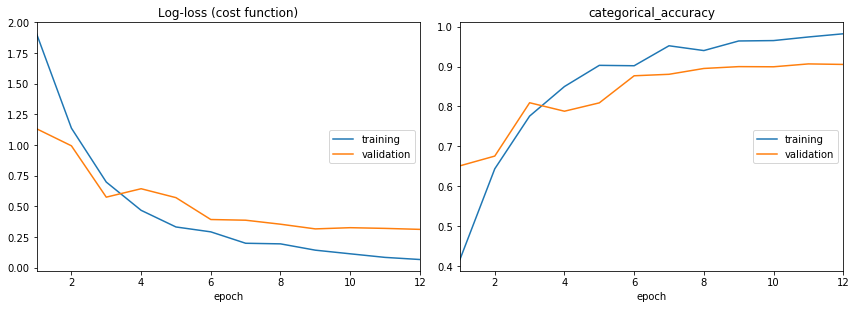

In [9]:
from livelossplot import PlotLossesKeras
batch_size = 128
epochs = 12
model = build_and_compile(input_shape, num_classes)
model.fit(small_x_train, small_y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[best_weights, 
                     current_weights,
                     PlotLossesKeras()],
          validation_data=(x_test, y_test))

# Congratulations! 
you now know most of the tools to get going with your models.

Please remember to give us feedback at the very end
https://docs.google.com/forms/d/e/1FAIpQLSfOrciwCGaXOsYn0U86yfu9SHwau-9YAfkzKaGN7OP6-OGjKQ/viewform